# ЗАДАНИЕ

## Технологическая справка
- Чтобы рационально вести производство SMART нужны большие и маленькие баклуши. Из маленькой баклуши не сделаешь большую ложку. Из большой маленькую – можно. Но при этом увеличится время вырезания и, кроме этого, материал уйдет в стружку.
- При хорошей работе из полена могут получиться две большие баклуши, или четыре маленьких. Но могут получиться и щепки.

Фирме SMART (Spoon Manufacturing, Research & Trading) нужно обеспечить свое производство деревянных ложек заготовками: в следующем месяце она планирует выпустить 4000 больших и 4000 маленьких ложек.  
Для этого SMART наняла на условиях повременной оплаты – **50 руб. в час** - четырех мужиков – Ерему, Емелю, Евлампия и Евгения - и поручила им бить баклуши.  
Перед каждым поставлена цель: работая в течение трех дней обеспечить заготовками производство **1 000 больших и 1 000 маленьких ложек**.  
Каждому был выдан топор и обеспечен доступ на склад поленьев, стоимостью **5 руб. каждое**.  
По итогам анализа планируется определить и оставить на контракте двоих лучших из 4Е, и, кроме того, установить на дальнейшее рациональные нормы для оценки работы, а, возможно и премирования.

**ТРЕБУЕТСЯ** в порядке помощи менеджерам SMART предложить:
1. Показатели результативности, эффективности и экономичности, допускающие численное выражение.
2. На основе введенных показателей оценить работу каждого из 4Е, охарактеризовать их, как работников и определить их рейтинги.
3. Предложить и обосновать нормы для справедливой оценки подобной работы в дальнейшем.

Внесём результаты работы в dataframe:

In [86]:
import pandas as pd

df = pd.DataFrame({'name': ['Ерёма', 'Емеля', 'Евлампий', 'Евгений'],
                   'hours': [28, 22, 24, 26],
                   'log_count': [780, 875, 760, 1000],
                   'big_billet': [1000, 800, 1200, 1100],
                   'small_billet': [1000, 1200, 500, 1200]});

По определению: **результативность** *- это получение нужного результата или "сделать то, что требуется"*.  
Перед каждым работником поставлена задача: произвести 1000 маленьких и 1000 больших заготовок. Т.к. при перепроизводстве больших баклуш из лишних заготовок можно сделать маленькие ложки, но с большими потерями древесины, то при вычислении результативности можно учесть кол-во перепроизведённых больших баклуш в кол-ве маленьких, но с коэффициентом 0,5, т.к. затраты древесины на производство маленькой ложки из большой заготовки в 2 раза больше. Перепроизводство сверх плана учитывать не будем, т.к. план на следующий месяц неизвестен.  
В случае, когда есть перепроизводство больших заготовок и недостаток маленьких, будем использовать формулу:  

$$
\frac{min(\textit{мал.заг., план мал.заг.}) + min(\textit{бол.заг., план бол.заг.}) + min(\textit{план мал.заг. - мал.заг., бол.заг. - план бол.заг.}) * 0,5}{\textit{план бол.заг. + план мал.заг.}}
$$

где ***мал.заг.*** - *количество произведённых маленьких заготовок*  
***план мал.заг.*** - *планируемое количество маленьких заготовок*  
***бол.заг.*** - *количество произведённых больших заготовок*  
***план бол.заг.*** - *планируемое количество больших заготовок*

В остальных случаях используем формулу:

$$
\frac{min(\textit{мал.заг., план мал.заг.}) + min(\textit{бол.заг., план бол.заг.})}{\textit{план бол.заг. + план мал.заг.}}
$$

In [87]:
big_billet_plan = 1000
small_billet_plan = 1000

df['performance'] = df.apply(lambda x: (min (x['big_billet'], big_billet_plan) + min(x['small_billet'], small_billet_plan) + (min((small_billet_plan - x['small_billet']),( x['big_billet'] - big_billet_plan)) * 0.5)) / (big_billet_plan + small_billet_plan) if ((x['big_billet'] > big_billet_plan) and (x['small_billet'] < small_billet_plan)) else (min(x['big_billet'], big_billet_plan) + min(x['small_billet'], small_billet_plan)) / (big_billet_plan + small_billet_plan), axis = 1)

По определению: **эффективность** - *это наилучшее использование ресурсов или высокое значение отношения выходов преобразования ко входам.* Наш ресурс - поленья. Можно расчиатать эффективность использования поленьев по формуле:

$$
\frac{\textit{бол.заг. * 0,5 + мал.заг. * 0,25}}{\textit{кол-во пол.}}
$$

где ***бол.заг.*** - *количество произведённых больших заготовок*  
***мал.заг.*** - *количество произведённых маленьких заготовок*

In [88]:
df['efficiency'] = df.apply(lambda x: (x['big_billet'] * 0.5 + x['small_billet'] * 0.25) / (x['log_count']), axis = 1)

По определению: **экономичность** - *это сделать дёшево*. Для этого рассчитаем себестоимость маленьких и больших баклуш каждого работника:  

$$
\textit{полные затраты = пол. * 5 + часы * 50}
$$

$$
\frac{\textit{себестоимость маленькой заготовки = полные затраты *}\frac{1}{3}}{\textit{кол-во маленьких заготовок}}
$$

$$
\frac{\textit{себестоимость большой заготовки = полные затраты *}\frac{2}{3}}{\textit{кол-во маленьких заготовок}}
$$

In [89]:
work_cost = df['log_count'] * 5 + df['hours'] * 50
df['small_billet_cost'] = (work_cost / 3) / df['small_billet']
df['big_billet_cost'] = (work_cost * 2 / 3) / df['big_billet']

In [90]:
df.round(2)

,name,hours,log_count,big_billet,small_billet,performance,efficiency,small_billet_cost,big_billet_cost
0,Ерёма,28,780,1000,1000,1.0,0.96,1.77,3.53
1,Емеля,22,875,800,1200,0.9,0.80,1.52,4.56
2,Евлампий,24,760,1200,500,0.8,0.95,3.33,2.78
3,Евгений,26,1000,1100,1200,1.0,0.85,1.75,3.82


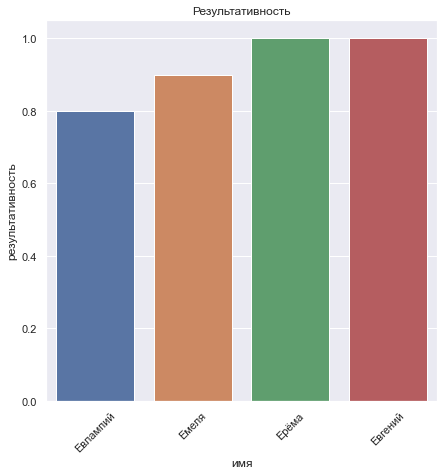

In [104]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.bar(df.sort_values(by='performance'), x='name', y='performance', color='name',
             width=450, height=400, color_discrete_sequence=px.colors.qualitative.Set3)
for trace in fig.data:
    trace.hovertemplate = '<b>%{x}</b><br>Результативность %{y}'
fig.update_layout(
    title={
        'text': "Результативность",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='Результативность',
    showlegend=False
    )
fig.show()

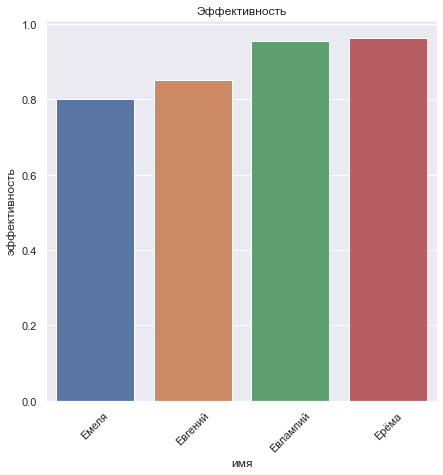

In [106]:
fig = px.bar(df.sort_values(by='efficiency'), x='name', y='efficiency', color='name',
             width=450, height=400, color_discrete_sequence=px.colors.qualitative.Set3)
for trace in fig.data:
    trace.hovertemplate = '<b>%{x}</b><br>Эффективность %{y}'
fig.update_layout(
    title={
        'text': "Эффективность",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='Эффективность',
    showlegend=False
    )
fig.show()

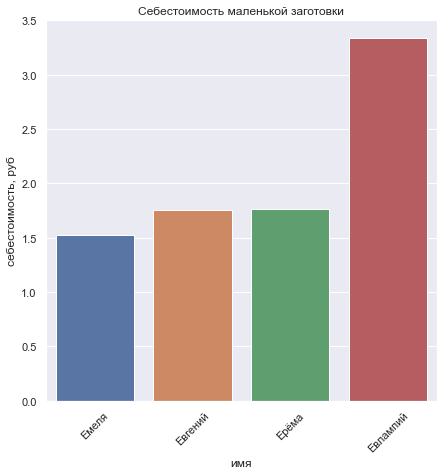

In [107]:
fig = px.bar(df.sort_values(by='small_billet_cost'), x='name', y='small_billet_cost', color='name',
             width=450, height=400, color_discrete_sequence=px.colors.qualitative.Set3)
for trace in fig.data:
    trace.hovertemplate = '<b>%{x}</b><br>Себестоимость %{y}'
fig.update_layout(
    title={
        'text': "Себестоимость маленькой заготовки",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='Себестоимость, руб',
    showlegend=False
    )
fig.show()

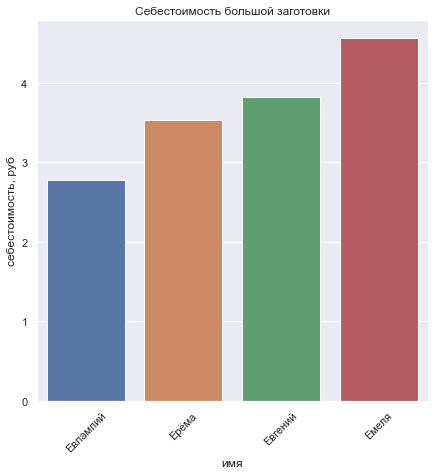

In [108]:
fig = px.bar(df.sort_values(by='big_billet_cost'), x='name', y='big_billet_cost', color='name',
             width=450, height=400, color_discrete_sequence=px.colors.qualitative.Set3)
for trace in fig.data:
    trace.hovertemplate = '<b>%{x}</b><br>Себестоимость %{y}'
fig.update_layout(
    title={
        'text': "Себестоимость большой заготовки",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='',
    yaxis_title='Себестоимость, руб',
    showlegend=False
    )
fig.show()

## Вывод

- т.к. главный показатель для нас результативность, на контракте рекомендуется оставить Ерёму и Евгения
- Емеля не выполнил план по большим заготовкам, а Евлампий - по маленьким
- для дальнейшей оценки работы предлагается использовать показатель результативности
- показатель экономичности использовать для расчёта премии, при выполнении плана